<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png"
width="450" height="450">
</img>
<br>
<i><b>Docente:</b> John Corredor.</i>
<br>
<i><b>Asignatura:</b> High Performance Computing </i>
<br>
<i><b>Estudiante:</b> Oscar Eduardo Miranda Puentes</i>
<br>
<i><b>Tema:</b> Regresión lineal </i>
<br>
<i>23/11/22</i>
<br>
</FONT>
</p>

#**Introducción:**

###En el presente notebook se van a analizar los datos de un archivo csv, "winequality-white", este recolecta información sobre las caraterísticas de diferentes muestras Portuguesas de vino blanco. 
###Se va a desarrollar un modelo de regresión lineal utilizando sklearn, para realizar una predicción sobre la calidad del vino según sus características. Siendo un este proceso de clasificación derivado de la regresión lineal.
###El dataset cuenta con las siguientes caraterísticas por columnas:

1 - fixed acidity \
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
12 - quality (valores entres 0 y 10)
###Para más detalles puede remitirse a las fuentes del dataset, donde se encuentran conjutos de datos similares y mayor información de los datos.
Enlace 1: [Enlace a Kaggle](https://drive.google.com/file/d/1Aur25PThXdwU5J3c1qEtnYkcuLoRKKHW/view?usp=sharing)





In [195]:
'''
Como primer paso se deben importar todas las librerias necesarias para el modelo
de regresión lineal. Entre estas, la más relevante será las de sklearn que son
las precisas para, realizar el modelo de regrsión sin tener que hacer todos los
cálculos función por función.
'''
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from tabulate import tabulate
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report



#**1. Análisis Exploratorio de Datos**

In [196]:
'''
Se declara una variable "url" que va a almacenar la dirección de github del 
archivo winequality-white.csv. Luego, se decalara la variable "vino" con la cual 
se utiliza pandaspara leer el archivo, para posteriormente imprimir los datos
originales dentro del winequality-white.csv.
'''
url = ('https://raw.githubusercontent.com/OscarMirandaPuentes/HPC-Tercer_Examen_Parcial-Oscar-Miranda/main/PYTHON%20-%20LinearRegression%20-%20WineQuality/winequality-white.csv')
vino = pd.read_csv(url)
print(vino)



      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      45.00   
1               6.3              0.30         0.34             1.6      49.00   
2               8.1              0.28         0.40             6.9       0.05   
3               7.2              0.23         0.32             8.5      58.00   
4               7.2              0.23         0.32             8.5      58.00   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      39.00   
4894            6.6              0.32         0.36             8.0      47.00   
4895            6.5              0.24         0.19             1.2      41.00   
4896            5.5              0.29         0.30             1.1      22.00   
4897            6.0              0.21         0.38             0.8       0.02   

      free sulfur dioxide  

In [197]:
vino.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,1001.0000,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,49.00,14.0,132.0,994.0000,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,58.00,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,58.00,47.0,186.0,0.9956,3.19,0.40,9.9,6


###Despues de ejecutar se ve la totalidad de columnas y filas del achivo csv. En este caso compuesto por 12 columnas y 4898 filas.
###Para este conjunto de datos se tiene cabecera, que especifica la caraterística cuantificada, por ello luego se van a realizar comparaciones entre los datos de las columnas.

In [198]:
'''
Utilizando el método info() es posible visualizar información sobre las columnas 
con datos no nulos, mostrando su tipo de dato en cada caso. Además, el método 
imprime la cantidad de memoria usada. 
'''
vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [199]:
'''
Con el método isnul() se revisa la cantidad de datos nulos en el conjunto de 
datos. Con el método sum() junto al anterior se cuentan todos los datos que son
nulos por las columnas del archivo.
'''
vino.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###

In [200]:
'''
Con el método de describe() muestra características de los datos
por cada colummna. Esta información estadística se retorna tomando 
todos los valores válidos excluyendo a los datos faltantes, como con
el método anterior se confirma que no hay datos falatantes se sabe 
que el resultado de describe() es realizado con todos los datos. 
'''
df2 = vino.describe()
print(df2)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788         11.421639     0.334192        6.391415   
std         0.843868         69.454196     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.270000     0.320000        5.200000   
75%         7.300000          0.330000     0.390000        9.900000   
max        14.200000       1005.000000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean     40.608069            35.308085            138.360657    63.448456   
std      24.967489            17.007137             42.498065   241.123878   
min       0.020000             2.000000         

###Con la ejecucción anterior se observan datos importantes como la desviación estándar y los promedios. Estos se tendrán en cuenta más adelante para cálculos posteriores.

In [201]:
'''
Para la mejorar la precisión del modelo de regresión lineal, se puede apoyar 
verificando la cantidad de datos duplicados, información necesaria para casos 
donde los datos que se tienen no permiten repeticiones.
'''
duplicados = vino.duplicated()
print(duplicados.sum())



937


###En este caso los datos duplicados no representan un problema para el modelo.Si de alguna manera los datos duplicados generan incoherencias para el análisis estos pueden ser eliminados con el método remove()

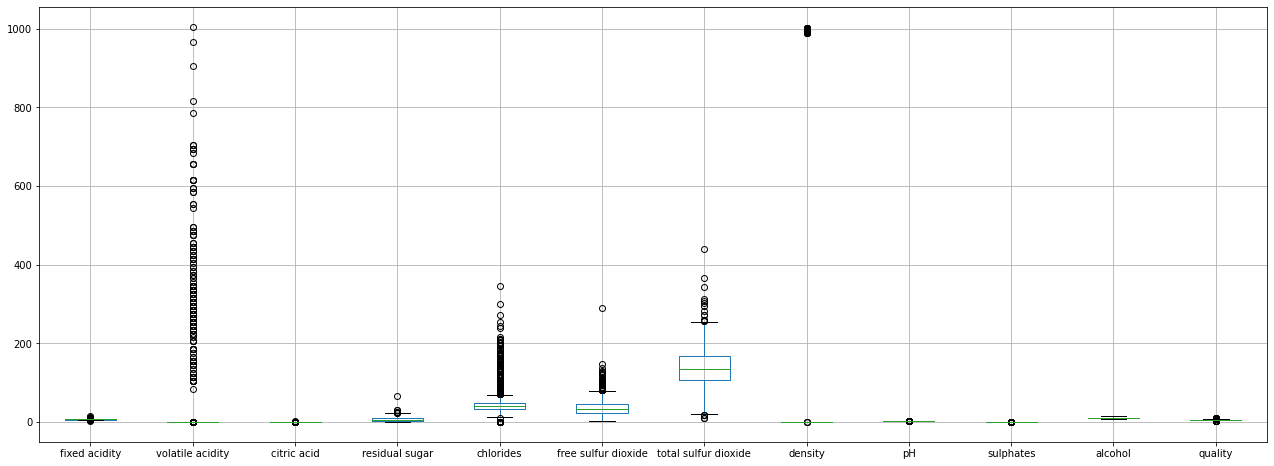

In [202]:
'''
Mediante el método boxplot() se puede calcula los datos outlier que se 
encuentran en cada columand de datos.
'''
figure1 = plt.figure(figsize=(22, 8))
vino.boxplot()
plt.show()

###Depués de realizar el gráfico se observa que la columna de volatile acidity es la que contiene mayor cantidad de datos fuera del rango. También resaltar los datos fuera de rango de la columna de chlorides, free sulfur dioxide y total sulfur dioxide. Estos valores átipicos pueden representar un ajuste no muy exacto al momento de hacer la regresión lineal, esto debido a qué presenta una mayor diferencia a la hora de de normalizar los datos.  

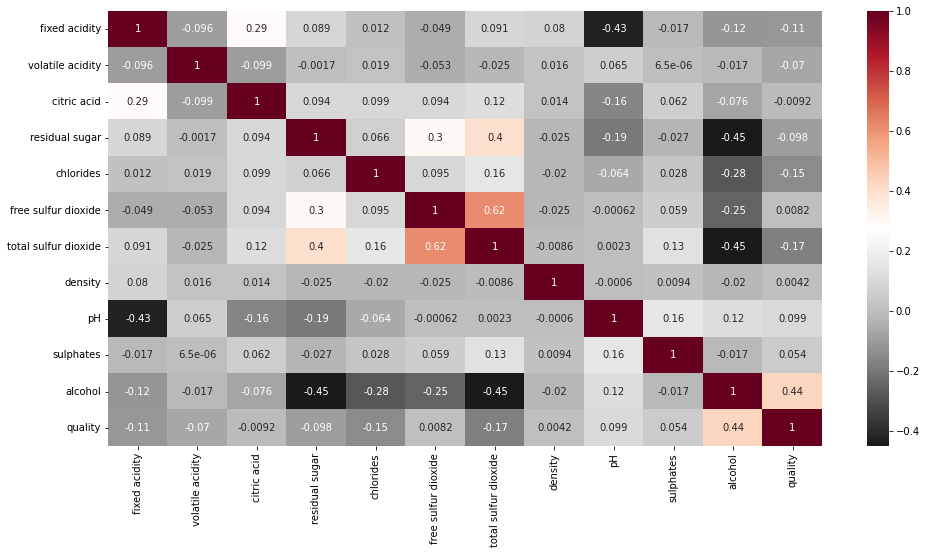

In [203]:
'''
Con el método de heatmap() y corr() es posible visualizar el cálculo de la 
corelación de los datos en un mapa de calor. 
Teniendo el siguiente rango de medición
0: donde no existe correlación, las variables no se ven afectadas entre ellas
1: La correlación es positiva, ente más cerca uno mayor relación hay
-1:Correlación negativa, donde las variables son  opuestas todo el tiempo
'''
figure1 = plt.figure(figsize=(16, 8))
sns.heatmap(vino.corr(),annot=True,cmap='RdGy_r')
plt.show()

#Relación caraterísticas del vino con respecto a su calidad:
###Se detallan gráficas de barras que muestran la relación que todas las caraterísticas del vino blanco tienen respecto a la calidad resultante.

###Se utiliza el método barplot de seaborn para realizr las gráficas.

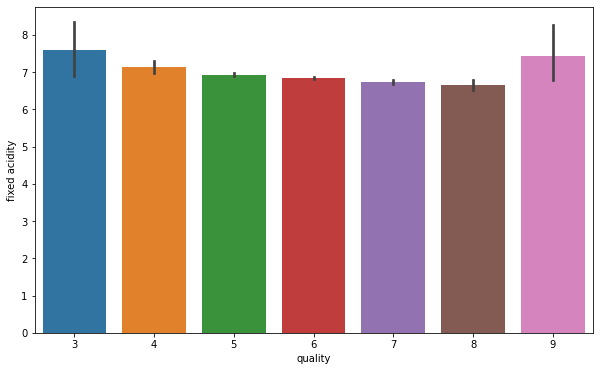

In [204]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = vino)
plt.show()

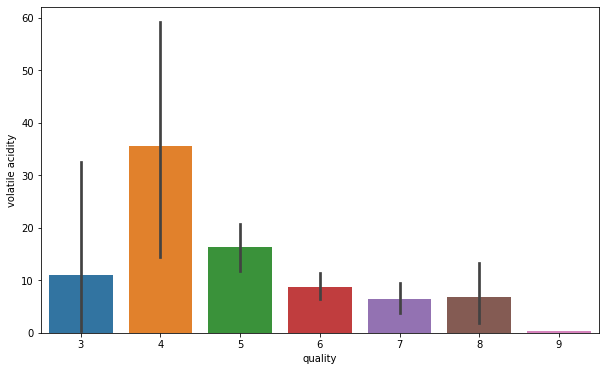

In [205]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = vino)
plt.show()

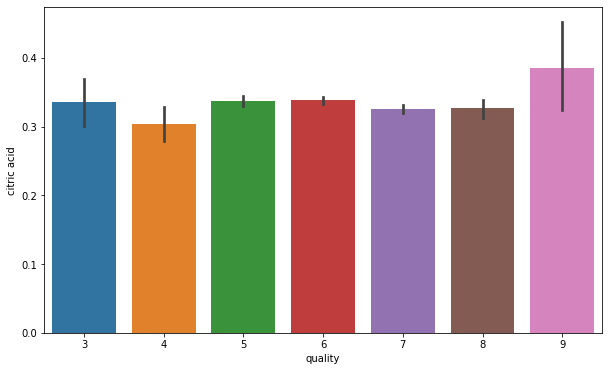

In [206]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = vino)
plt.show()

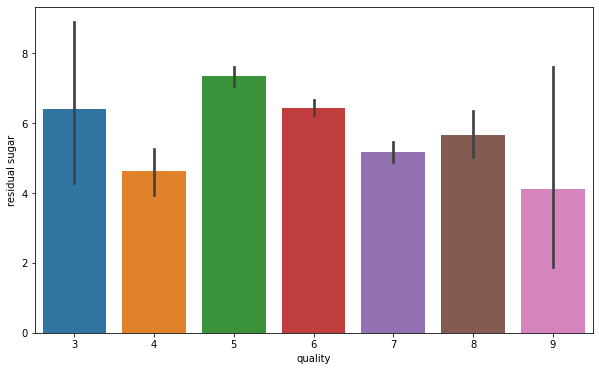

In [207]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = vino)
plt.show()

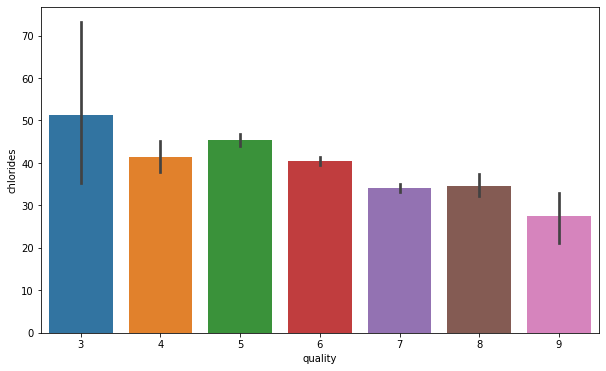

In [208]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = vino)
plt.show()

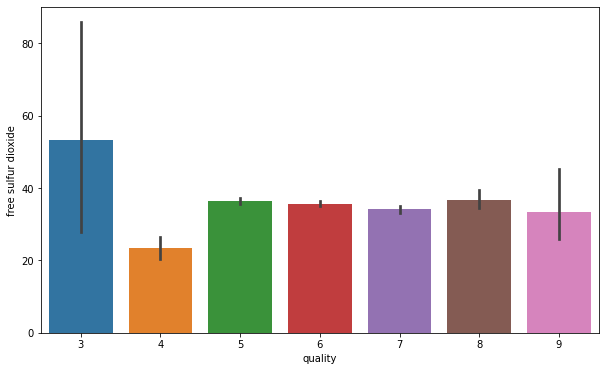

In [209]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = vino)
plt.show()

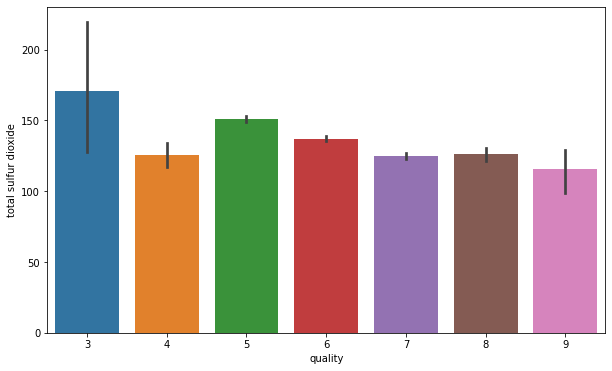

In [210]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = vino)
plt.show()

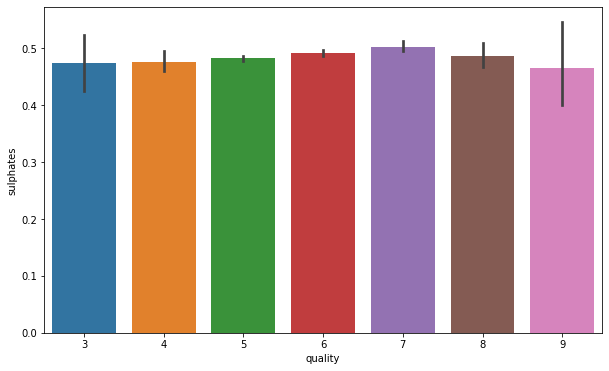

In [211]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = vino)
plt.show()

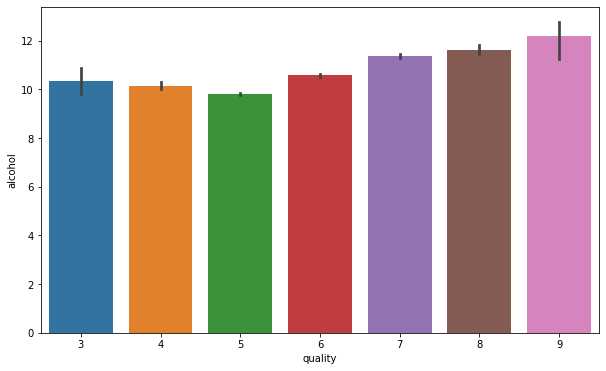

In [212]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = vino)
plt.show()

## 2) **Validación de promedios por columnas:**

In [213]:
'''
Mediante un bucle for, que toma el rango de las 12 columnas se da la
instrucción que para cada una de estas calcule e imprima el promedio 
utilizando la función mean(). 

Además para efectos de visualización se utiliza round para reducir el 
número de decimales de cada promedio calculado.

'''
df2 = round(vino[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]].mean(),3)
print("Promedio por columnas: \n")
print(df2)

Promedio por columnas: 

fixed acidity             6.855
volatile acidity         11.422
citric acid               0.334
residual sugar            6.391
chlorides                40.608
free sulfur dioxide      35.308
total sulfur dioxide    138.361
density                  63.448
pH                        3.188
sulphates                 0.490
alcohol                  10.514
quality                   5.878
dtype: float64


##**3) Validación de las deviaciones estandar:**
###Por definición la desviación estándar es la medida utilizada para obtener la cantidad de disperción entre los datos. Esta disperción implica que en cuanto más grande sea el valor de la desviasión, resultará en que los datos se encuentran distribuidos dentro de un rango más grande.

Columna                      std
fixed acidity             0.843868
volatile acidity         69.454196
citric acid               0.121020
residual sugar            5.072058
chlorides                24.967489
free sulfur dioxide      17.007137
total sulfur dioxide     42.498065
density                 241.123878
pH                        0.151001
sulphates                 0.114126
alcohol                   1.230621
quality                   0.885639
dtype: float64 



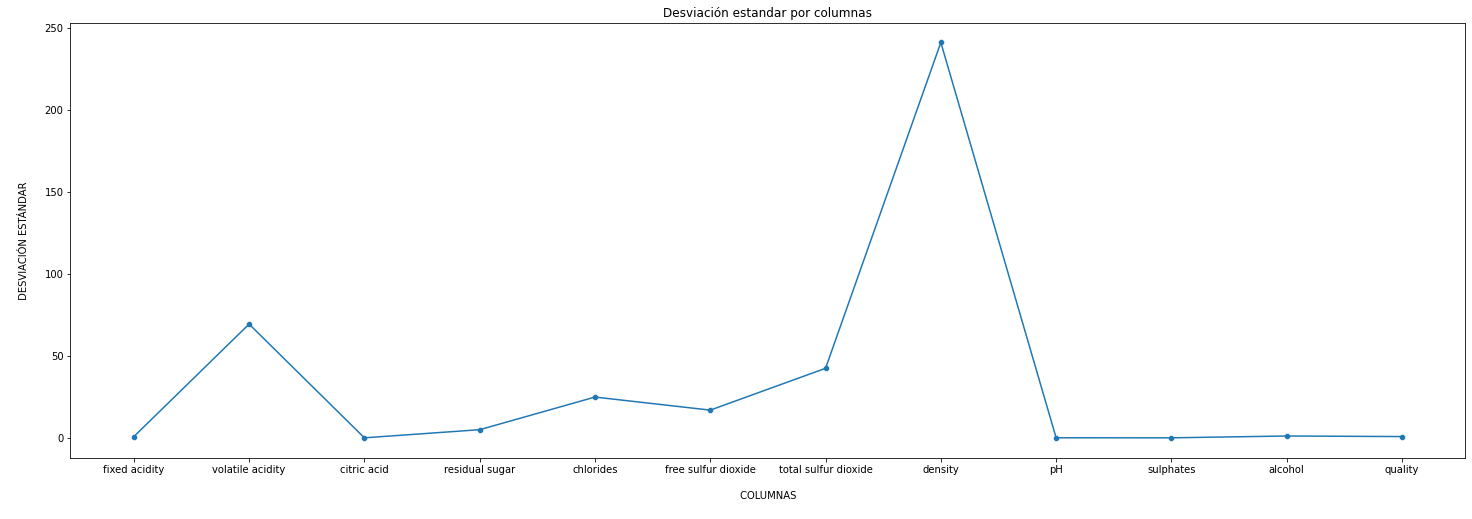

In [214]:
'''
Se declara una variable que almacena la desviación estándar de las columnas.
Esta operación es bastante ágil de realizar con la función std() de numpy,
puesto que simplemente con llamarla efectúa el cáculo que detallado anteriormente.
'''
cols_std = vino.std()
print("Columna ", "                    std")
print(cols_std,"\n" )

figure1 = plt.figure(figsize=(25, 8))
graph =sns.scatterplot(y= cols_std.values, x= cols_std.index)
cols_std.plot()
plt.title('Desviación estandar por columnas')
plt.ylabel('\n DESVIACIÓN ESTÁNDAR \n')
plt.xlabel('\n COLUMNAS \n')
plt.show()

##**4) Normalización de los datos:**##

In [215]:
'''
Se realiza la normalización de todos los datos para establecer un rango más 
pequeño entre ellos. Esta operación se utiliza para poder tratar los datos mejor
en el modelo de regresión lineal.
'''
def Normalizar(data):
    normalizador = preprocessing.StandardScaler().fit(data)
    df_norm = normalizador.transform(data)
    return df_norm

normal_data1 = Normalizar(vino)
print("Normalización de  los datos: ")
print(normal_data1)

Normalización de  los datos: 
[[ 1.72096961e-01 -1.60577454e-01  2.13280202e-01 ... -3.49184257e-01
  -1.39315246e+00  1.37870140e-01]
 [-6.57501128e-01 -1.60145470e-01  4.80011213e-02 ...  1.34184656e-03
  -8.24275678e-01  1.37870140e-01]
 [ 1.47575110e+00 -1.60433459e-01  5.43838363e-01 ... -4.36815783e-01
  -3.36667007e-01  1.37870140e-01]
 ...
 [-4.20473102e-01 -1.61009437e-01 -1.19159198e+00 ... -2.61552731e-01
  -9.05543789e-01  1.37870140e-01]
 [-1.60561323e+00 -1.60289465e-01 -2.82557040e-01 ... -9.62604939e-01
   1.85757201e+00  1.26711420e+00]
 [-1.01304317e+00 -1.61441421e-01  3.78559282e-01 ... -1.48839409e+00
   1.04489089e+00  1.37870140e-01]]


##5) **Entrenamiento del modelo y verificación por métrica de rendimiento:**
###Mediante los método acontinuación se puede separar la cantidad de datos que se van a utilizar para entrenar el modelo y los que se usan para porbarlo. Con todo establecido se podrá realizar una predicción con base a los datos que se dieron. Por ultimo, la predicción se medirá su rendimento mediente la métrica de R2 score, que indica cuán bueno es el modelo siendo directamente proporcional a cuán grande se el valor entre (0,1).


 ---------MODELO REGRESIÓN----------
Resultado de la métrica de rendimiento =  0.09719396384376988 ≈ 9.719 %
Suma residual de cuadrados (MSE): 0.90




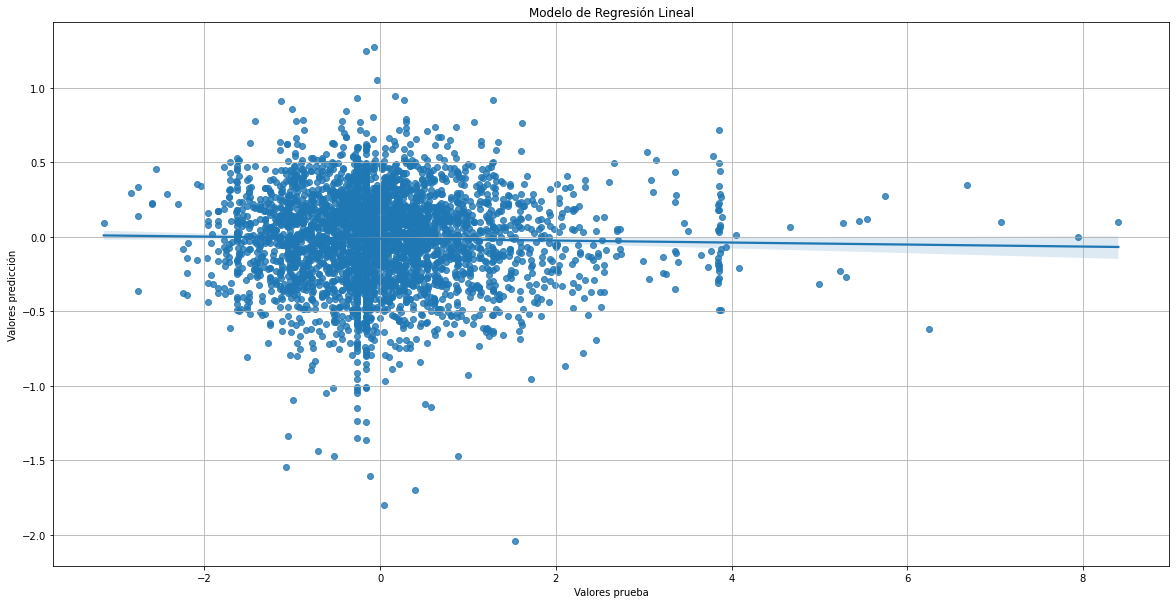

In [216]:
'''
Se dividen las matrices de que contienen los datos de la varible dependiente y 
la variable independiente. Esta división se asignó a las 11 primeras columnas 
para la variable x y la ultima para la variable y. 

Luego se asigna la cantidad de datos que se utilizarán para la prueba y el 
entrenamiento del modelo. Posteriormente, se realiza la regresión lineal, 
mdeiante el método  LinearRegression y con el modelo la predicción "Y_pred", 
para luego evaluarla con el r2_score.

'''
X = np.array(normal_data1[:,0:10])
y = np.array(normal_data1[:,-1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)
regr = LinearRegression()
regr.fit(X_test, y_test)
Y_pred= regr.predict(X_test)
print("\n", "---------MODELO REGRESIÓN----------")
print("Resultado de la métrica de rendimiento = ", r2_score(y_test, Y_pred), "≈",(round(r2_score(y_test, Y_pred),5)*100),"%")
print("Suma residual de cuadrados (MSE): %.2f" % np.mean((Y_pred - y_test) ** 2))
print("\n")

x = np.resize(X_test,(3919))

y = Y_pred

fig = plt.figure(figsize=(20,10))

sns.regplot(x=x,y=y)
plt.title('Modelo de Regresión Lineal')
plt.ylabel('Valores predicción')
plt.xlabel('Valores prueba')
plt.grid()
plt.show()

###Este modelo presenta una presición del 9.5% (Varía un poco en el rango de 7% a 11% según los datos que sean utlizados en esa ejecucción para la predicción)
###Un valor muy bajo para ser considerado un buen modelo, por lo que demuetra que la condición de los datos outliers acarreó un deficiente ajuste a la recta de predicción.


 ---------MODELO REGRESIÓN----------
Resultado de la métrica de rendimiento =  0.07897818515037158 ≈ 7.898 %




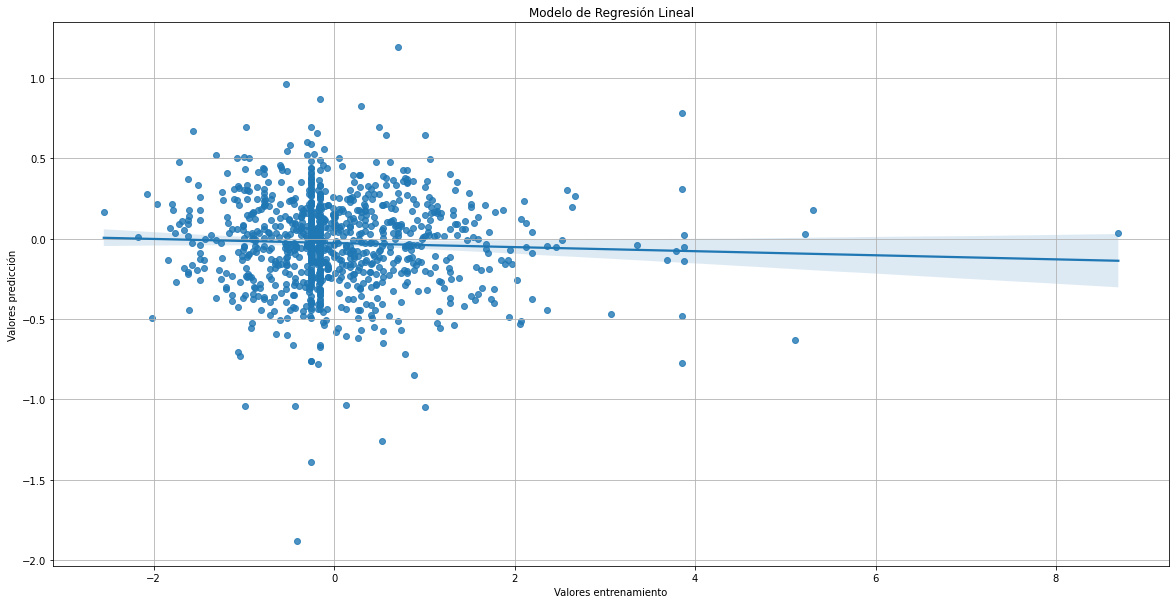

In [217]:
'''
En esta celda se realiza el cálculo del modelo de regresion utilizando los datos
entrenamiento en vez de los de prueba para ver qué diferencias presenta.
'''
X = np.array(normal_data1[:,0:10])

y = np.array(normal_data1[:,-1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)

regr = LinearRegression()
regr.fit(X_train, y_train)
Y_pred= regr.predict(X_train)


print("\n", "---------MODELO REGRESIÓN----------")
print("Resultado de la métrica de rendimiento = ", r2_score(y_train, Y_pred), "≈",(round(r2_score(y_train, Y_pred),5)*100),"%")
print("\n")


x = np.resize(X_train,(979))
y = Y_pred

fig = plt.figure(figsize=(20,10))
sns.regplot(x=x,y=y)
plt.title('Modelo de Regresión Lineal')
plt.ylabel('Valores predicción')
plt.xlabel('Valores entrenamiento')
plt.grid()
plt.show()

###Comparando ambas ejecucciones de la regresión lineal se ve una poca diferencia en cuanto a la métrica. Sin embargo observando la gráfica se ve que con los datos de entrenamiento se tiene una pendiente más pronunciada y un mejor ajuste a la recta de predicción.

#6) Random Forest Classifier 
###Depués de calcular el modelo de regresión lineal, se procede a utilizar el modelo de Random forest classifier. Este es un modelo para clasificar los valores de la calidad del vino, según sus características. Para este dataset se utilizó un clasificador binario donde la calidad puede ser buena o mala. Por lo que acontinuación se realiza la implementación utilizando la librería de RandomForestClassifier.

In [218]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
vino['quality'] = pd.cut(vino['quality'], bins = bins, labels = group_names)

In [219]:
label_quality = LabelEncoder()

In [220]:
vino['quality'] = label_quality.fit_transform(vino['quality'])

In [221]:
vino['quality'].value_counts()


0    3838
1    1055
2       5
Name: quality, dtype: int64

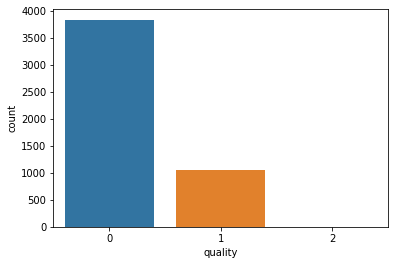

In [222]:
x = "quality"
sns.countplot(vino[x])
plt.show()

In [223]:
X = vino.drop('quality', axis = 1)
y = vino['quality']

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [225]:
sc = StandardScaler()

In [226]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [227]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [228]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       753
           1       0.77      0.41      0.54       227

    accuracy                           0.84       980
   macro avg       0.81      0.69      0.72       980
weighted avg       0.83      0.84      0.82       980



In [229]:
print(confusion_matrix(y_test, pred_rfc))

[[725  28]
 [133  94]]


#7) Comparación con C++
###En primer lugar, la forma en la que se abre el csv. En c++ se tuvo que declarar una clase que recibe el archivo, el separador y si tiene o no encabezado. Esto demuestra el funcionamiento "interno" del método de pandas read_csv, siendo pues la version de python mucho más útil al simplemente tener que llamar el read_csv para que este reciba el archivo. También cabe resaltar que en c++ se deben utilizar matrices Eigen para el mejor manejo de los datos, en comparación con Python que matrices numpy. 
![picture](https://drive.google.com/uc?id=10lXcWWxMHkzk2H-Pee9HZJ6YqdoYM0Hv)

###Ya entrando en materia del modelo, la función de costo y la métrica de rendimiento deben ser descritas en la clase de Regresion lineal, a difrencia de Python porque en esta implemntación se hace uso de sklearn para realizar todas esas funciones de forma implicita que toca describir completas en c++. Tambien esta la métrica de rendimiento se realiza con un método que realiza el calculo del R2 score. Para estas operaciones se observa un mayor grado de complejidad en el de c++ al tener que manipular las matrices, sus filas y columnas para realizar los cálculos y divisiones de los datos. Sin embargo, aunque requiera mayor complejidad luego en la ejecución resulta en una métrica mucho más  precisa que en Python. 
![picture](https://drive.google.com/uc?id=1Xfeld0Jp5Oi_iWHngeF133odFKqmxcj2)
![picture](https://drive.google.com/uc?id=1HmKujA--dIteZAaZkooWXhvWD7Ydz2As)

###La ejecución es otra de las grandes diferencias, los resultados son similares cuando son utilizados los datos de prueba dando un 0.06 mucho mas cercano al programa en Python que cuando se utilizan los datos de entrenamiento que en C++ sorpresivamente da un resultado de métrica bajo, pero mucho mejor que el resultado de la métrica en Python.
![picture](https://drive.google.com/uc?id=1I6eAj0ngSH8Kp45qJabKKaWL-jGA_9sG)

##**Conclusiones:**

* Gracias a los datos de calidad del dataset, con el clasificar de Random forest es posible visualizar cuantas muestras de vino pueden ser consideradas buenas o malas. Como se pudo observar en la gráfica del random forest se ve que abundan los vinos de mala calidad a largo del dataset, después se puede ver que la prescision de este clasificador es bastante alta. Esto determina que para este modelo es mucho más sencillo y preciso clasificar los datos, que ajustarlos a una recta que prediga los la calidad del vino según las muestras del dataset. 

* Teniendo en cuenta la métrica de rendimiento del R2 score, se tiene un aproximado de 9% en la mayoría de ejecuciones. Por lo anterior este método de regresión lineal nos indica que, para este conjunto de datos, no es la más apropiada dado su bajo rendimiento. Además, se puede observar graficamente que los puntos estan bastante alejados de la recta, confirmando el dato numérico de la métrica de rendimiento. 

* Por ultimo, es importante resaltar los diversos métodos de graficación que las librerias de python otorgan. Siendo muy útil al momento de verificar los calculos realizados por otras librerias y así comparar si hay errores, cosa que en C++ no se pueden confirmar.

* Con esta implenetación en Python, se pudo comprarar con la implementación hecha en clase en C++. Siendo evidente las facilidades que las librerias de sklearn y numpy otorgan al momento de realizar un modelo de regresión lineal, siendo esta muy utiles para ahorrar lineas de operaciones algebricas propias de la definición del modelo. Además, se puede confirmar que los métodos de las librerias funcionan correctamente al comparar los resultados de la implementación de C++.

* Se puede observar que en la desviación estándar las columnas presentan una especie de intervalo iniciando con valor de desviación en las primeras que tiende a la alza y luego a bajar. Luego, tras una desviación baja empieza a subir bastante siendo las columnas 7, 8 y 9 las que mayor valor de disperción persentan y por ultimo termina en una valor más estable. 

* Al momento de revisar la cantidad de datos outliers se ve una gran cantidad de estos presentes en todas la columnas. Consecuentemente, lo anterior va a resultar en que la normalización de los datos no va a quedar lo suficientemente homogenea como para tener un modelo que con un buen grado de eficiencia. 

* Teniendo en cuenta las caraterísticas del vino, las que mayor relación tienen con su calidad son las de alcohol y la sulfatos. Esto da a entender solo con el analisis de datos que si estas características son optimizadas en la producción del vino, pueden mejorar en cierta medida la calidad del vino. 

##**Referencias:**

Raj, N. (2022, 19 agosto). Introduction to Exploratory Data Analysis (EDA). Analytics Vidhya. Recuperado 21 de octubre de 2022, de https://www.analyticsvidhya.com/blog/2021/02/introduction-to-exploratory-data-analysis-eda/

Minitab Blog Editor. (s. f.). Análisis de Regresión: ¿Cómo Puedo Interpretar el R-cuadrado y Evaluar la Bondad de Ajuste? Recuperado 21 de octubre de 2022, de https://blog.minitab.com/es/analisis-de-regresion-como-puedo-interpretar-el-r-cuadrado-y-evaluar-la-bondad-de-ajuste

numpy.resize — NumPy v1.23 Manual. (s. f.). Recuperado 21 de octubre de 2022, de https://numpy.org/doc/stable/reference/generated/numpy.resize.html

Polamuri, S. (2017, 20 febrero). Implementing Simple Linear Regression without any Python Machine learining libraries. Dataaspirant. Recuperado 21 de octubre de 2022, de https://dataaspirant.com/simple-linear-regression-python-without-any-machine-learning-libraries/

Introduction to Probability for Data Science. (s. f.). Recuperado 21 de octubre de 2022, de https://probability4datascience.com

scikit-learn: machine learning in Python — scikit-learn 1.1.2 documentation. (s. f.). Recuperado 21 de octubre de 2022, de https://scikit-learn.org/stable/

Scatter plot or added variable plot of linear regression model - MATLAB plot. (s. f.). Recuperado 21 de octubre de 2022, de https://www.mathworks.com/help/stats/linearmodel.plot.html

sklearn.ensemble.RandomForestClassifier. (s. f.). scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


Red Wine Quality. (2017, 28 noviembre). Kaggle. https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

AI Coding. (2020, 27 septiembre). Machine Learning C++ Tutorial: ETL + Linear Regression (Part I). YouTube. https://www.youtube.com/watch?v=jKtbNvCT8Dc

GitHub - coding-ai/machine_learning_cpp: Machine Learning C++. (s. f.). GitHub. https://github.com/coding-ai/machine_learning_cpp

Makefile Tutorial by Example. (s. f.). Makefile Tutorial. https://makefiletutorial.com

